## 导入数据

In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor # KNN回归
from sklearn.decomposition import PCA #降维-主成分分析

from collections import namedtuple
from pprint import pformat
from math import sqrt
from collections import namedtuple
from operator import itemgetter
from time import process_time
from random import random
from sklearn.neighbors import KDTree

from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
# 加载数据集
wine = pd.read_csv("D:/project/Jupyter/csdn/AI_ML/datasets/L5_2RedWine.csv")

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 数据探索

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

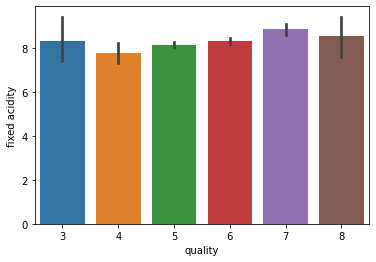

In [5]:
# 绘制质量与固定酸性两维度之间的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

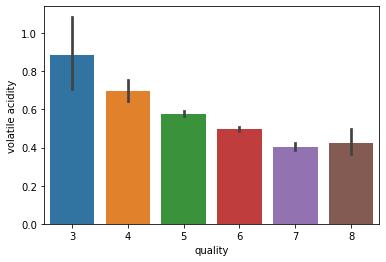

In [6]:
# 质量与挥发性酸度之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

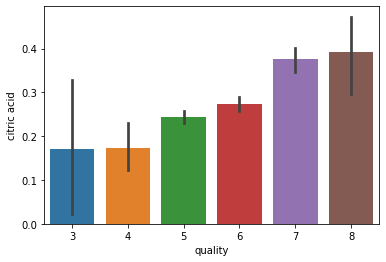

In [7]:
# 质量与柠檬酸含量之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

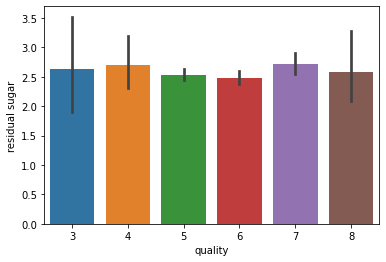

In [8]:
# 质量与残留糖分之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

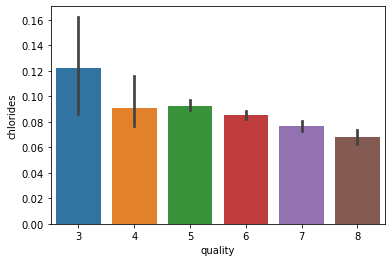

In [9]:
# 质量与氯化物之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

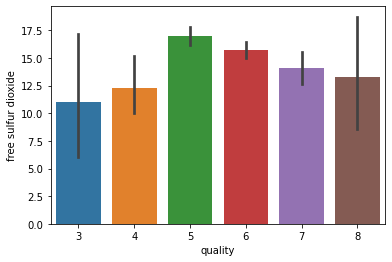

In [10]:
# 质量与游离二氧化硫之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

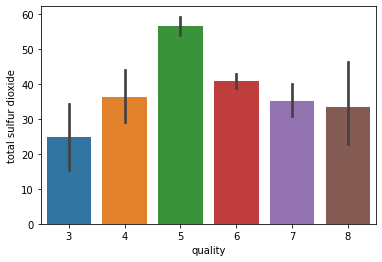

In [11]:
# 质量与总二氧化硫含量之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

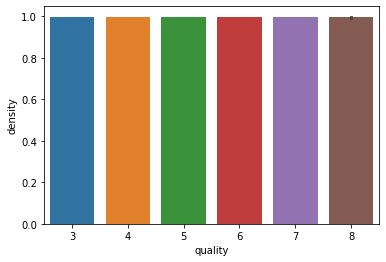

In [12]:
# 质量与密度之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

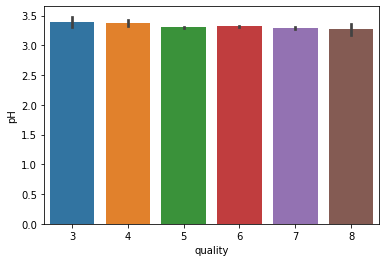

In [13]:
# 质量与酸碱度之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

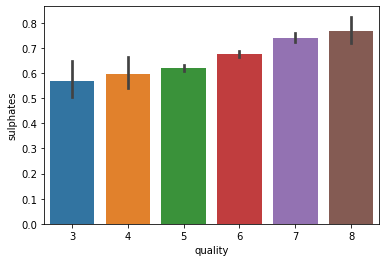

In [14]:
# 质量与硫酸盐之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

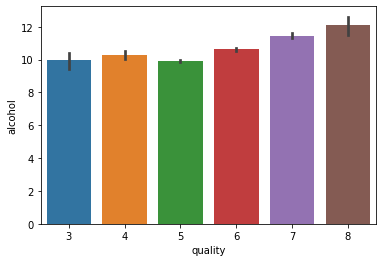

In [15]:
# 质量与酒精含量之间关系的条形图
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## 数据标准化与建模

In [16]:
# 分离特征和目标变量
X = wine.drop("quality", axis=1)
y = wine["quality"]

In [17]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# 创建 KNN 回归器，基于默认的欧氏距离
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
# 预测测试集
y_pred = knn.predict(X_test)

# 计算性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 0.43, R²: 0.33


## 超参数调优

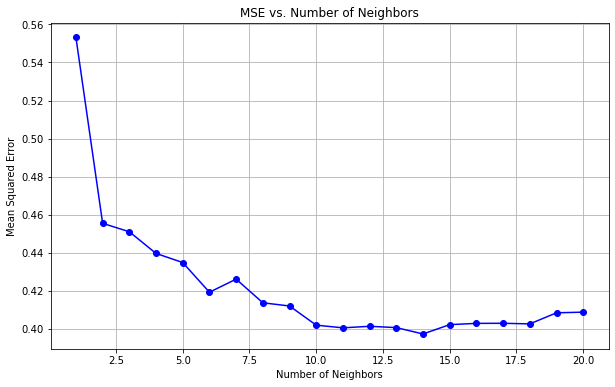

Optimal Number of Neighbors: 14


In [21]:
# 搜索最佳 n_neighbors 值
mse_scores = []
neighbors_range = range(1, 21)

for n in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# 绘制 MSE 随邻居数量变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, mse_scores, marker='o', linestyle='-', color='b')
plt.title("MSE vs. Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.show()

# 选择最佳邻居数量
best_n = neighbors_range[np.argmin(mse_scores)]
print(f"Optimal Number of Neighbors: {best_n}")

In [22]:
# 使用优化后的 KNN 建模
# 使用最佳邻居数重新训练模型
knn_optimized = KNeighborsRegressor(n_neighbors=best_n)
knn_optimized.fit(X_train, y_train)
y_pred_optimized = knn_optimized.predict(X_test)

# 计算优化后的性能指标
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
print(f"Optimized MSE: {mse_optimized:.2f}, Optimized R²: {r2_optimized:.2f}")

Optimized MSE: 0.40, Optimized R²: 0.39


In [23]:
# 构建 KD 树
kd_tree = KDTree(X_train)

# 使用 KD 树的邻近查找加速 KNN
knn_kd = KNeighborsRegressor(algorithm="kd_tree")
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)

# 评估性能
mse_kd = mean_squared_error(y_test, y_pred_kd)
r2_kd = r2_score(y_test, y_pred_kd)
print(f"KNN with KD Tree - MSE: {mse_kd:.2f}, R²: {r2_kd:.2f}")

KNN with KD Tree - MSE: 0.43, R²: 0.33


## 数据可视化比对

In [24]:
print(f"Final Optimized MSE: {mse_optimized:.2f}")
print(f"Final Optimized R²: {r2_optimized:.2f}")

Final Optimized MSE: 0.40
Final Optimized R²: 0.39


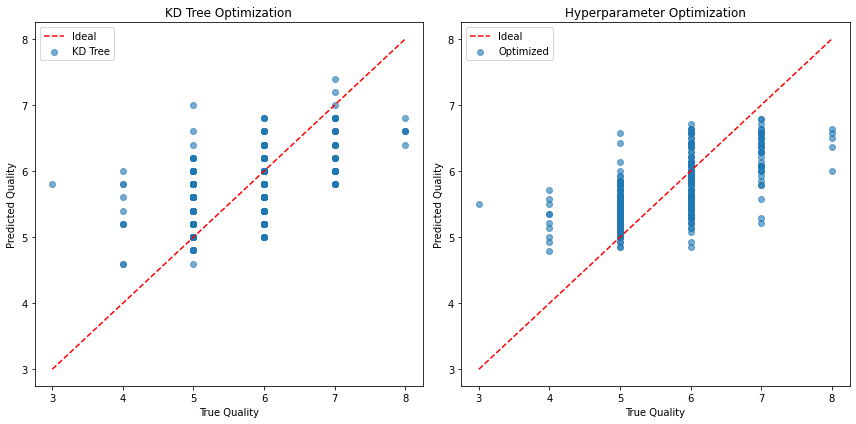

In [25]:
# 绘制预测点与真实点的对比散点图
plt.figure(figsize=(12, 6))

# 散点图 - KD 树优化
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_kd, alpha=0.6, label="KD Tree")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("KD Tree Optimization")
plt.legend()

# 散点图 - 超参数调优
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimized, alpha=0.6, label="Optimized")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Hyperparameter Optimization")
plt.legend()

plt.tight_layout()
plt.show()

## 使用 KD 树优化模型

In [26]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTreeCreate(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点

# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [27]:
# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [28]:
# 构建 KD 树
kd_tree = KdTreeCreate(X_train.tolist())

In [29]:
# 最近邻搜索实现
# 随机选一个测试样本点
test_point = X_test[0]
result_nearest = find_nearest(kd_tree, test_point)

print("最近邻点:", result_nearest.nearest_point)
print("最近距离:", result_nearest.nearest_dist)
print("访问过的节点数:", result_nearest.nodes_visited)

最近邻点: [-0.41987899893447156, -0.3937332840839297, -0.831599242183326, 0.0310243155907118, -0.19159211644456475, -0.3759717751139264, 0.07114823347796514, 0.014025499846469511, -0.6602541361430501, -0.5157862714661969, -0.3973267789065892]
最近距离: 1.16934942644453
访问过的节点数: 997


## 降维与可视化

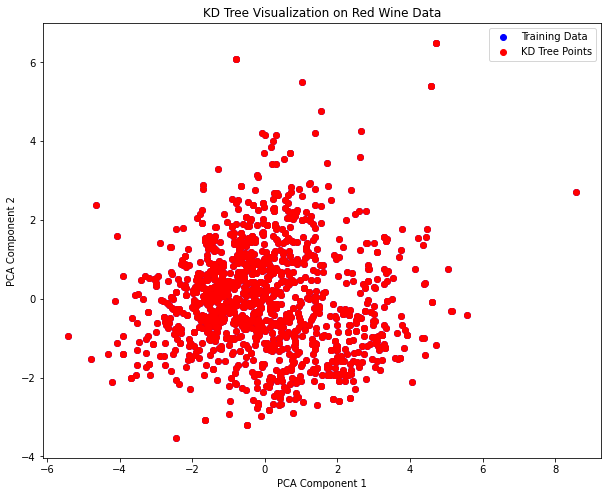

In [30]:
# 降维到 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# KD 树中存储的点降维
tree_points = []
def collect_points(node):
    if node:
        tree_points.append(node.dom_elt)
        collect_points(node.left)
        collect_points(node.right)
collect_points(kd_tree.root)

tree_points_2d = pca.transform(tree_points)

# 绘制点
plt.figure(figsize=(10, 8))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='blue', label="Training Data")
plt.scatter(tree_points_2d[:, 0], tree_points_2d[:, 1], c='red', label="KD Tree Points")

plt.title("KD Tree Visualization on Red Wine Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()